In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read the CSV file
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5,Automatic
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,...,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5,Automatic
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,...,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6,Manual
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,...,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4,Automatic


In [3]:
np.random.seed(2018)
sample=np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]

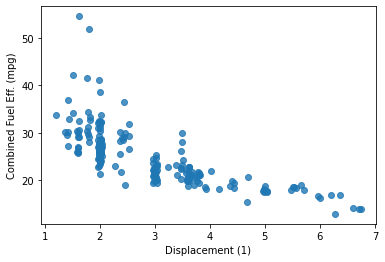

In [4]:
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',x_jitter=0.04, fit_reg=False);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

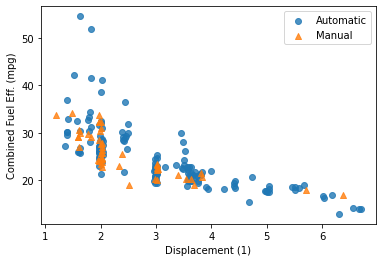

In [5]:
ttype_markers = [['Automatic','o'],['Manual','^']]
for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset.trans_type == ttype]
    sns.regplot(data = plot_data, x = 'displ', y = 'comb',x_jitter=0.04, fit_reg=False, marker=marker);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic','Manual']);

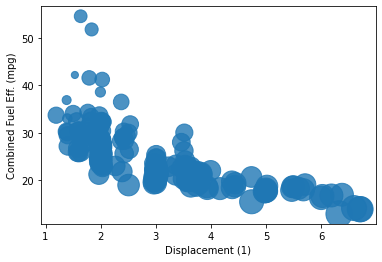

In [6]:
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',x_jitter=0.04, fit_reg=False,
            scatter_kws={'s':fuel_econ_subset.co2});
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

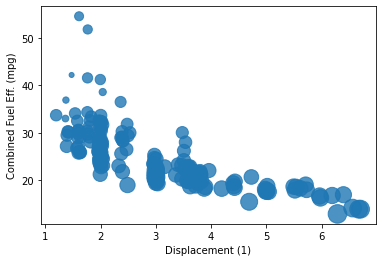

In [7]:
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',x_jitter=0.04, fit_reg=False,
            scatter_kws={'s':fuel_econ_subset.co2/2});
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

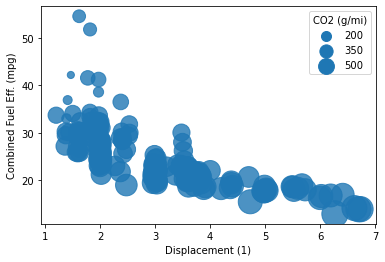

In [8]:
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',x_jitter=0.04, fit_reg=False,
            scatter_kws={'s':fuel_econ_subset.co2});
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
base_color = sns.color_palette()[0]
sizes = [200,350,500]
legend_obj=[]
for s in sizes:
    legend_obj.append(plt.scatter([],[],s=s/2,color=base_color))
plt.legend(legend_obj,sizes,title='CO2 (g/mi)');

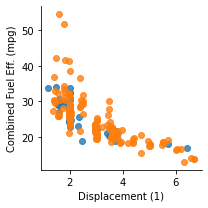

In [9]:
g = sns.FacetGrid(data = fuel_econ_subset,hue='trans_type')
g.map(sns.regplot,'displ','comb',x_jitter=0.04, fit_reg=False);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

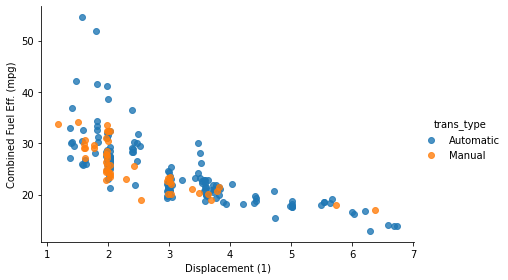

In [10]:
g = sns.FacetGrid(data = fuel_econ_subset,hue='trans_type',hue_order=['Automatic','Manual'],height=4,aspect=1.5)
g.map(sns.regplot,'displ','comb',x_jitter=0.04, fit_reg=False);
g.add_legend()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

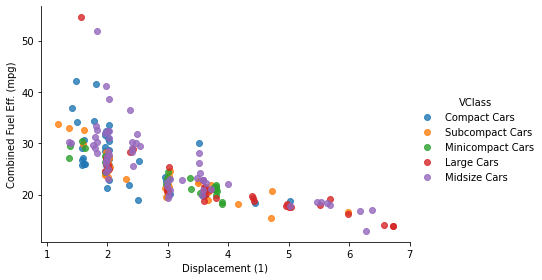

In [11]:
g = sns.FacetGrid(data = fuel_econ_subset,hue='VClass',height=4,aspect=1.5)
g.map(sns.regplot,'displ','comb',x_jitter=0.04, fit_reg=False);
g.add_legend()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

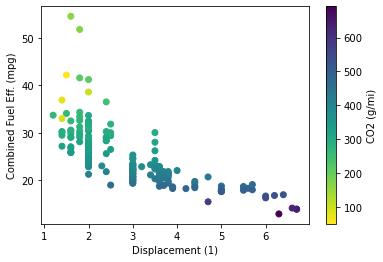

In [12]:
plt.scatter(data=fuel_econ_subset,x='displ',y='comb',c='co2', cmap='viridis_r')
plt.colorbar(label='CO2 (g/mi)')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

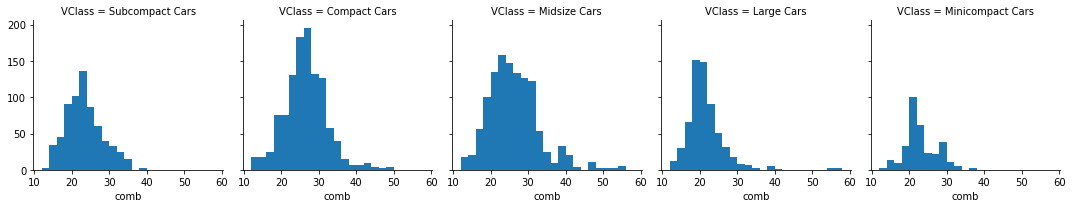

In [13]:
bins = np.arange(12,58+2,2)
g = sns.FacetGrid(data = fuel_econ,col='VClass')
g.map(plt.hist,'comb',bins=bins);

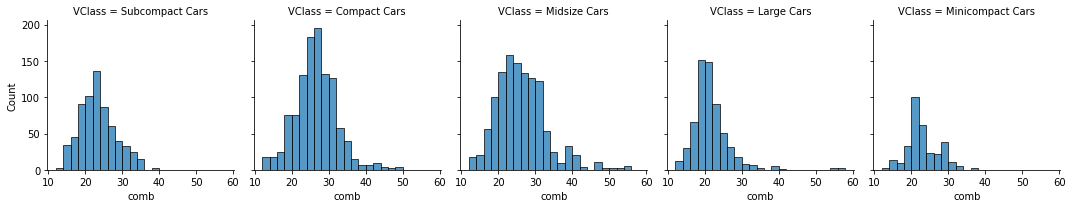

In [14]:
bins = np.arange(12,58+2,2)
g = sns.FacetGrid(data = fuel_econ,col='VClass')
g.map(sns.histplot,'comb',bins=bins);

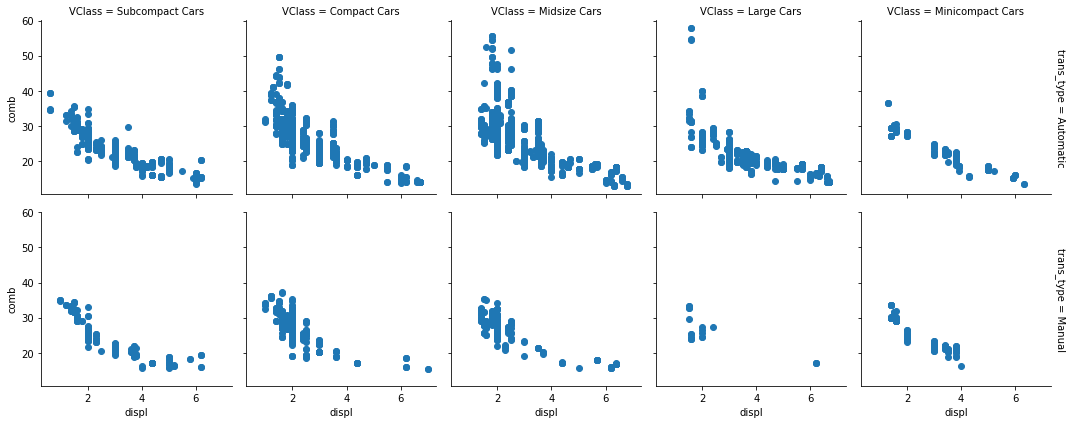

In [15]:
g = sns.FacetGrid(data = fuel_econ,col='VClass',row='trans_type', margin_titles=True)

g.map(plt.scatter,'displ','comb');

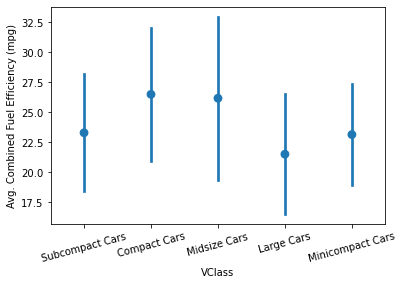

In [16]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb',ci='sd', linestyles='')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

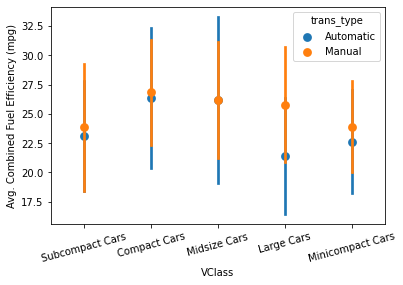

In [17]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb',hue='trans_type',ci='sd', linestyles='')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

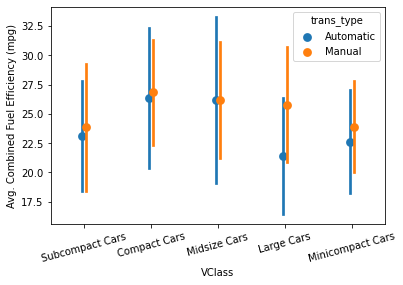

In [18]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb',hue='trans_type',ci='sd', linestyles='',dodge=True)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

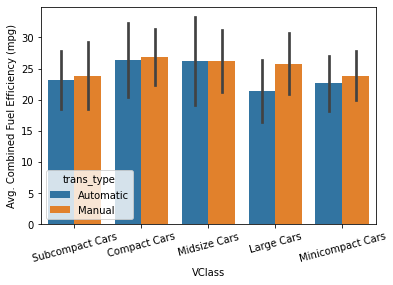

In [19]:
sns.barplot(data=fuel_econ, x='VClass', y='comb',hue='trans_type',ci='sd',)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

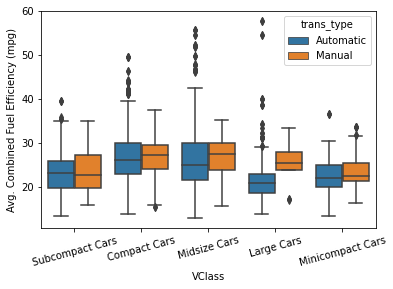

In [20]:
sns.boxplot(data=fuel_econ, x='VClass', y='comb',hue='trans_type')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

plot heatmap with color based on count


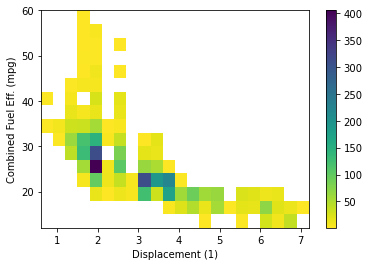

In [21]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
print('plot heatmap with color based on count')

In [28]:
# determine which bin each point falls using pd.cut. Also set label to false so that bins are identify numerically
#And set as type to int to make indexing easier
displ_bins = pd.cut(fuel_econ['displ'],bins_x,right=False,include_lowest=False,labels=False).astype(int)
comb_bins = pd.cut(fuel_econ['comb'],bins_y,right=False,include_lowest=False,labels=False).astype(int)

#Count up the number of point that falls on each bin
n_points = fuel_econ.groupby([displ_bins,comb_bins]).size()

#use reset index and pivot to put count in array form
n_points = n_points.reset_index().pivot(index='displ',columns ='comb').values

#Take CO2 series and divide each element by the number of points in each bin,
#using the cut bin vector for indexing into the right place 
co2_weights = fuel_econ['co2']/n_points[displ_bins,comb_bins]

Heatmap color based on mean of third variable, Let use average CO2 instead.There is weights parameter which set how much each data point is worth in the aggregationBy default Each point weight is worth one,so the color will refelct the total count.So if we change so that each point weight is equals to its CO2 emission divided by the number of cars in its bin,then the total within each bin will be average CO2 emission


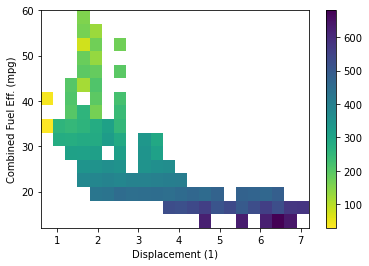

In [30]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y], weights=co2_weights)
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
print('Heatmap color based on mean of third variable, Let use average CO2 instead.' 
      'There is weights parameter which set how much each data point is worth in the aggregation'
     'By default Each point weight is worth one,so the color will refelct the total count.'
     'So if we change so that each point weight is equals to its CO2 emission divided by the number of cars in its bin,'
     'then the total within each bin will be average CO2 emission')

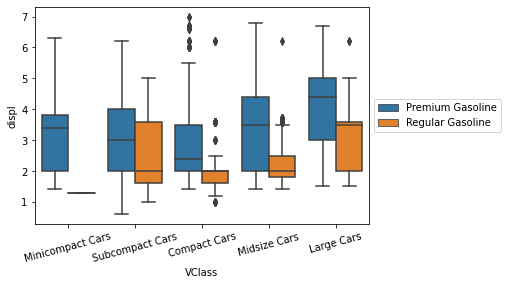

In [33]:
fuel_econ_sub = fuel_econ[(fuel_econ['fuelType'].apply(lambda x:x.split()[0]) =='Premium') | (fuel_econ['fuelType'].apply(lambda x:x.split()[0]) =='Regular')]

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
sns.boxplot(data=fuel_econ_sub, x='VClass', y='displ',hue='fuelType',order=sedan_classes)
plt.xticks(rotation=15);
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.ylabel('displ');

In [34]:
pkmon = pd.read_csv('pokemon.csv')

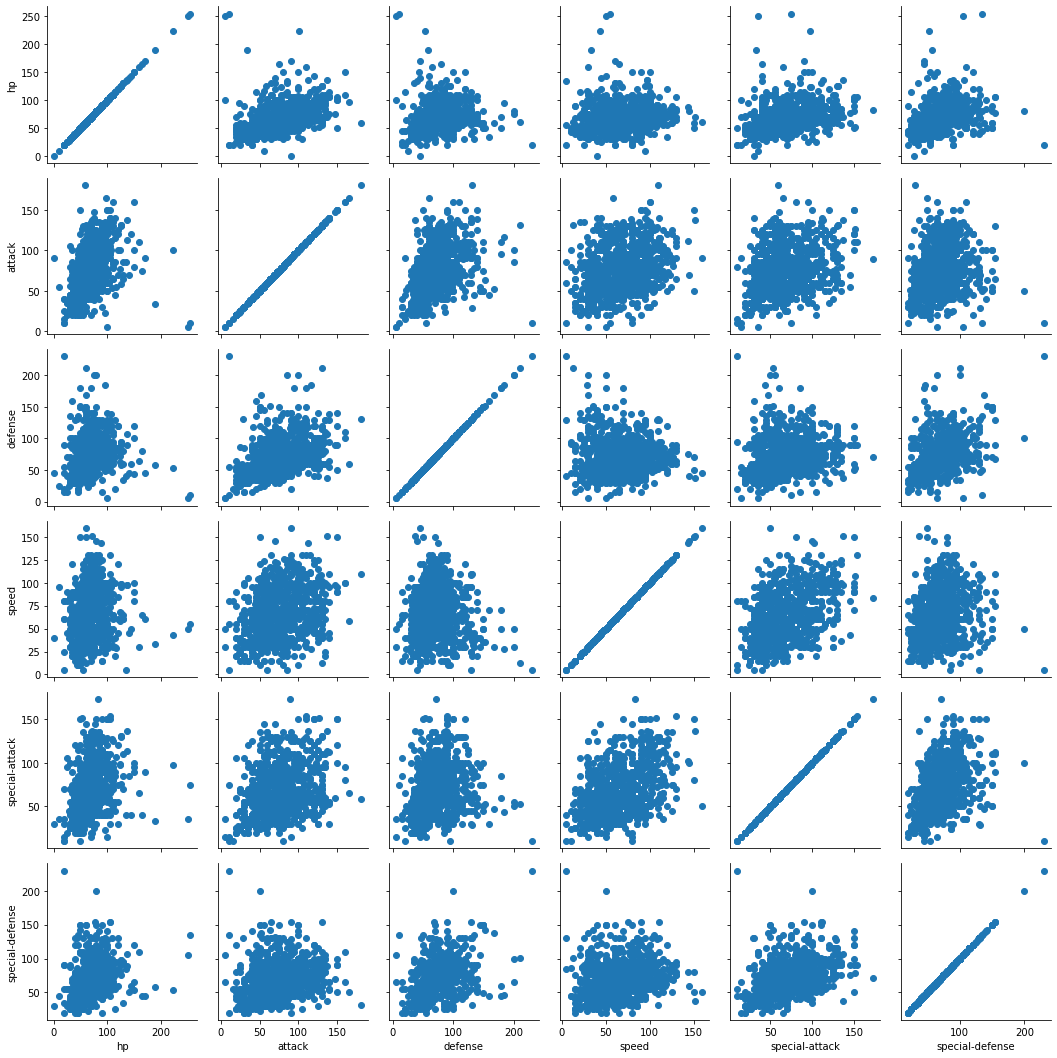

In [43]:
pkmon_state = ['hp', 'attack', 'defense', 'speed','special-attack', 'special-defense']
g = sns.PairGrid(data = pkmon,vars  =pkmon_state)
g.map(plt.scatter);

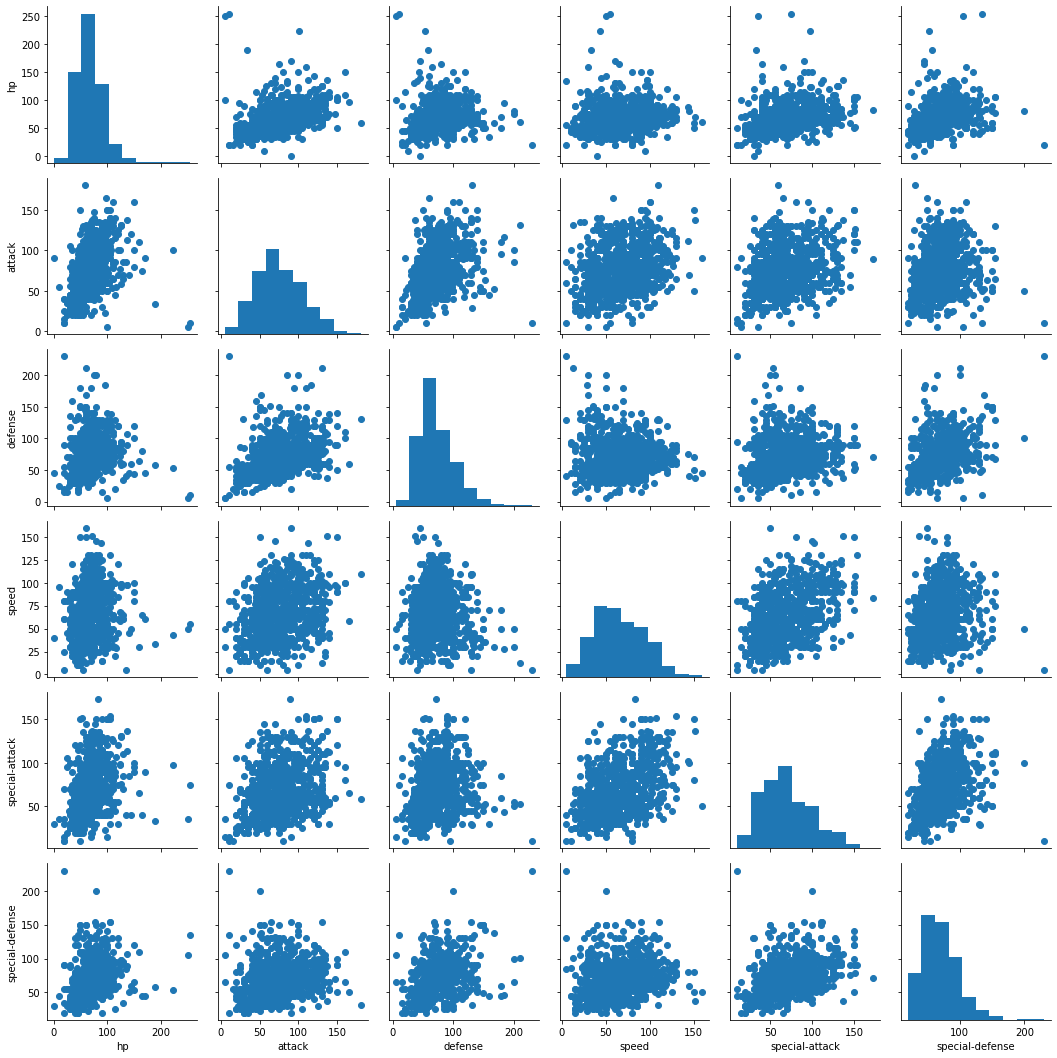

In [51]:
pkmon_state = ['hp', 'attack', 'defense', 'speed','special-attack', 'special-defense']
g = sns.PairGrid(data = pkmon,vars  =pkmon_state)
g = g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

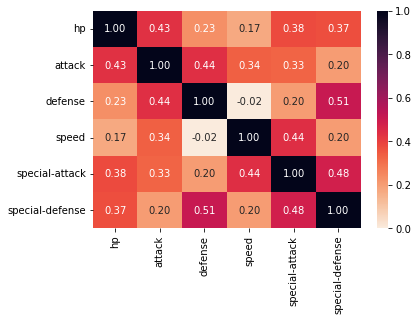

In [68]:
sns.heatmap(pkmon[pkmon_state].corr(),cmap='rocket_r',annot=True,fmt='.2f',vmin=0);

In [69]:
pkmon['atk_ratio'] = pkmon['attack']/pkmon['special-attack']
pkmon['def_ratio'] = pkmon['defense']/pkmon['special-defense']

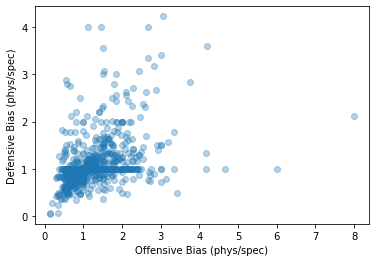

In [73]:
plt.scatter(data=pkmon,x='atk_ratio',y='def_ratio',alpha=1/3)
plt.xlabel('Offensive Bias (phys/spec)')
plt.ylabel('Defensive Bias (phys/spec)');

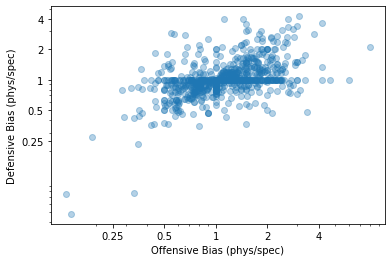

In [78]:
plt.scatter(data=pkmon,x='atk_ratio',y='def_ratio',alpha=1/3)
plt.xlabel('Offensive Bias (phys/spec)')
plt.ylabel('Defensive Bias (phys/spec)')
plt.xscale('log')
plt.yscale('log')
tick_loc = [0.25,0.5,1,2,4]
plt.xticks(tick_loc,tick_loc)
plt.yticks(tick_loc,tick_loc);

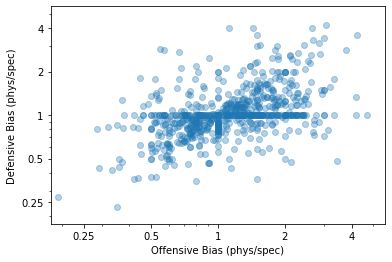

In [83]:
plt.scatter(data=pkmon,x='atk_ratio',y='def_ratio',alpha=1/3)
plt.xlabel('Offensive Bias (phys/spec)')
plt.ylabel('Defensive Bias (phys/spec)')
plt.xscale('log')
plt.yscale('log')
tick_loc = [0.25,0.5,1,2,4]
plt.xticks(tick_loc,tick_loc)
plt.yticks(tick_loc,tick_loc)
plt.xlim(2 ** -2.5,2**2.5)
plt.ylim(2 ** -2.5,2**2.5);

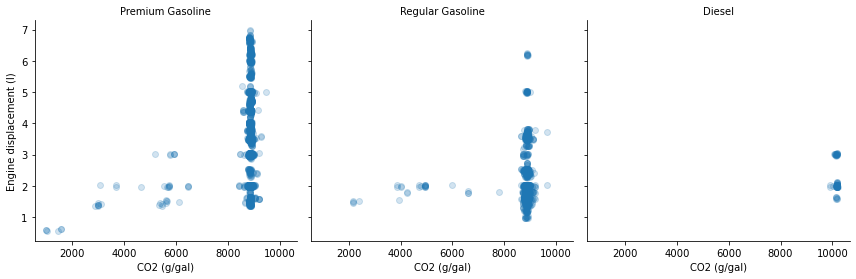

In [88]:
fuel_econ['co2_gal'] = fuel_econ['comb'] * fuel_econ['co2']
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline', 'Diesel'])]
# plotting
g = sns.FacetGrid(data = fuel_econ_sub, col = 'fuelType', height = 4, col_wrap = 3)
g.map(sns.regplot, 'co2_gal', 'displ', y_jitter = 0.04, fit_reg = False,
scatter_kws = {'alpha' : 1/5})
g.set_ylabels('Engine displacement (l)')
g.set_xlabels('CO2 (g/gal)')
g.set_titles('{col_name}') ;